# Evaluation von MLLM Performance

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import contextlib, io
import nltk
# Standard-Imports
import os
import pandas as pd
from eval_close import evaluate_close
from eval_open import evaluate_open
from eval_g_eval import evaluate_geeval, compare_models
from eval_combined import evaluate_combined
from pathlib import Path


[nltk_data] Downloading package wordnet to C:\Users\lukas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lukas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\lukas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\lukas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lukas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\lukas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Daten einlesen

In [3]:
base = Path.cwd().parent / "docs" / "gemma"
path = "fine_tuned_batchsize_2_test_set.csv"
path_combined = os.path.join(base, path)
path_close = os.path.join(base, path)
path_open  = os.path.join(base, path)
path_ge    = os.path.join(base, "g_eval_runs/batch_size_2_test_set_geval_run_1.csv")


In [3]:
evaluate_combined(path_close)

Combined Evaluation
Samples evaluated: 6719
BLEU-1: 0.5874
BLEU-2: 0.5809
BLEU-4: 0.5615
ROUGE-1: 0.5960
ROUGE-2: 0.0292
ROUGE-L: 0.5957
Token-F1: 0.5944
BERTScore-precision: 0.8090
BERTScore-recall: 0.7847
BERTScore-F1: 0.7913


# Ja Nein Antworten

In [4]:
evaluate_close(path_close)


[Close] Accuracy: 87.21%, Precision: 87.12%, Recall: 87.12%, F1: 87.12%
              precision    recall  f1-score   support

          no       0.86      0.86      0.86      1545
         yes       0.88      0.88      0.88      1816

    accuracy                           0.87      3361
   macro avg       0.87      0.87      0.87      3361
weighted avg       0.87      0.87      0.87      3361



# Offene Fragen

In [5]:
evaluate_open(path_open)


Open-Ended Evaluation
Samples evaluated: 3357
BLEU-1: 0.3027
BLEU-2: 0.2895
BLEU-4: 0.2508
ROUGE-1: 0.3197
ROUGE-2: 0.0584
ROUGE-L: 0.3191
Token-F1: 0.5372
BERTScore-precision: 0.7618
BERTScore-recall: 0.7288
BERTScore-F1: 0.7378


# G-Eval 

G-Eval Auswertung
Anzahl Samples      : 3134
Mittelwert G-Eval Score: 0.332

-- Judgment Verteilung --
  correct     :  24.9% (779x)
  incorrect   :  73.9% (2317x)
  partially correct; could mislead:   1.2% (38x)


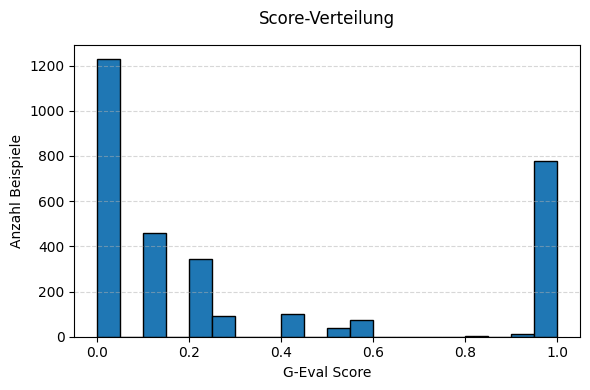

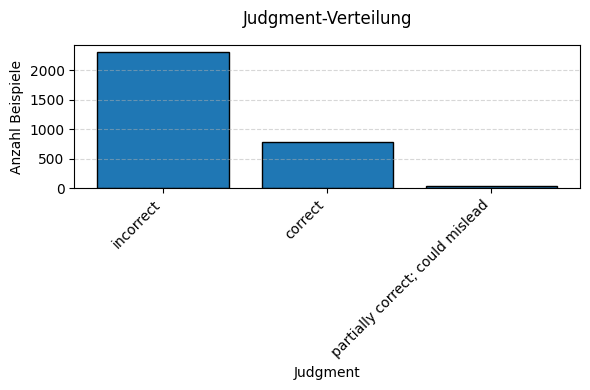

In [61]:
evaluate_geeval(path_ge)



===== Modellvergleich G-Eval =====
              mean_score  median_score  std_score  q25_score  q75_score
Batch Size 2       0.392           0.1      0.432        0.0        1.0
Zero-Shot          0.234           0.2      0.224        0.1        0.3
Few-Shot           0.157           0.1      0.215        0.0        0.2


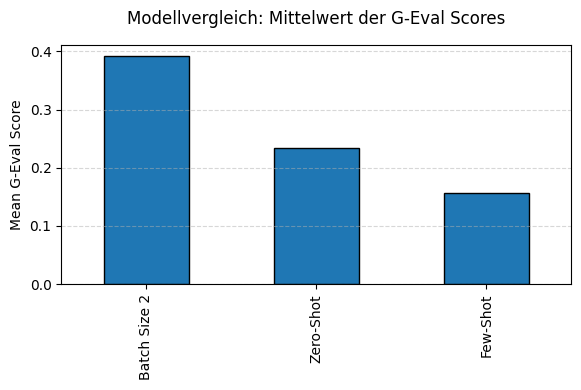

<Figure size 600x400 with 0 Axes>

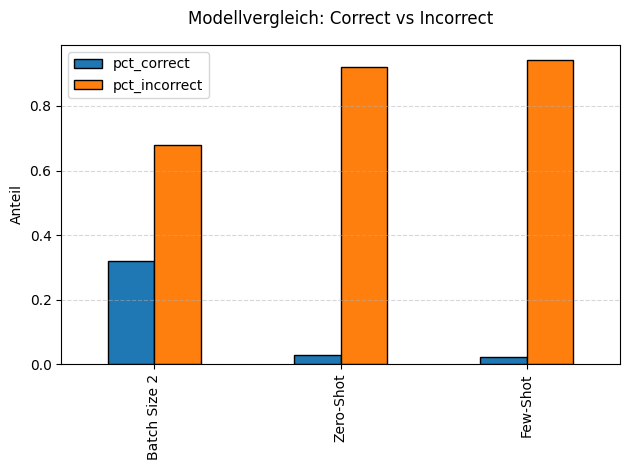

In [4]:
model_paths = {
    "Batch Size 2" :            os.path.join(base, "g_eval_runs/batch_size_2_g_eval_run_1.csv"),
    "Few-Shot":            os.path.join(base, "g_eval_runs/few_shot_g_eval_run_1.csv"),
    "Zero-Shot" :            os.path.join(base, "g_eval_runs/zero_shot_g_eval_run_1.csv")
}

compare_models(model_paths, do_plot=True)
